## Problem 1

- $E[U(X)] = E[X] - \frac{\alpha}{2}E[X^{2}] = \mu - \frac{\alpha}{2}(\sigma^{2} + \mu^{2})$  
- $X_{CE} = U^{-1}(\mu - \frac{\alpha}{2}(\sigma^{2} + \mu^{2}))$  
- $\pi_{A} = \mu - U^{-1}(\mu - \frac{\alpha}{2}(\sigma^{2} + \mu^{2}))$   

In [14]:
import numpy as np
import seaborn as sns


In [23]:
def find_x(y, alpha):
    utility_func = lambda x: (x - (alpha / 2)*(x**2))
    for x_ in np.arange(0., 1.0, 0.01):
        if np.isclose( utility_func(x_), y, atol=0.1 ):
            return x_
    return x_

def allocation_value(*, alloc, alpha, r, mu, sigma):
    EUX = alloc*mu - (alpha / 2)*(alloc**2)*((sigma**2) + (mu**2))
    return (1-alloc)*r + find_x(y=EUX, alpha=alpha)

<AxesSubplot:>

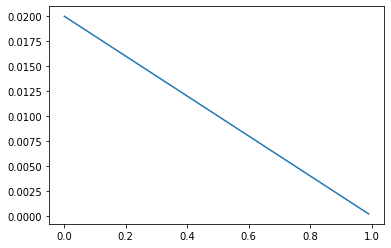

In [25]:
alloc_array = np.arange(0, 1.0, 0.01)
ys = [allocation_value(alloc=alloc, alpha=0.01, r=0.02, mu=0.05, sigma=0.15) for alloc in alloc_array]

sns.lineplot(x=alloc_array, y=ys)

## Problem 2
__Quick Answer:__  Optimal policy $\pi^{*} = \frac{\mu - r}{\sigma^{2}}$
  
__Proofs:__  
If we allocate $\pi$ into risky asset, and denote the wealth to be $W_{t}$; then $dW_{t} = (r + \pi*(\mu - r))*W_{t}*dt + \pi*\sigma*W_{t}*z_{t}$.  
Therefore, we have log(W_{t} = N($r + \pi*(\mu - r) - \frac{\pi^{2}\sigma^{2}}{2}$, $\pi^{2}\sigma^{2}$).  

With Utility function $U(X) = log(X)$, we have $E[U(X)] = r + \pi*(\mu - r) - \frac{\pi^{2}\sigma^{2}}{2}$.  We have $X_{CE} = e^{r + \pi*(\mu - r) - \frac{\pi^{2}\sigma^{2}}{2}}$.  We want to maximize $X_{CE} = e^{r + \pi*(\mu - r) - \frac{\pi^{2}\sigma^{2}}{2}}$, or equivalently maximize $r + \pi*(\mu - r) - \frac{\pi^{2}\sigma^{2}}{2}$.  Taking the partial derivative, and setting it to zero, we get the solution.

## Problem 3

### Part (A):  
Invest fixed proportion $0 <= f <= 1$ of initial wealth $W_{0}$.  
2 outcomes:  
(1) $W_{0}(1 + \alpha*f)$,  
(2) $W_{0}(1 - \beta*f)$

### Part (B):  
2 outcomes to log utility:
(1) $log(W_{0}) + log(1 + \alpha*f)$,  
(2) $log(W_{0}) + log(1 - \beta*f)$

### Part (C):  
$E[log(W)] = log(W) + p*log(1 + \alpha*f) + (1-p)*log(1 - \beta*f)$

### Part (D):  
First derivative with respect to $f$ is:  
$\frac{p*\alpha}{1 + \alpha*f} - \frac{(1-p)*\beta}{1 - \beta*f}$

### Part (E):  
Setting the first derivative to zero (and solving for $f$), we get:  
$f^{*} = p*\frac{1}{\beta} - (1-p)*\frac{1}{\alpha}$  
  
Taking the second derivative, we get:  
$-\frac{p*(\alpha^2)}{(1 + \alpha*f)^2} - \frac{(1-p)*(\beta^2)}{(1 - \beta*f)^2} < 0$  
since all of the terms in the expression are positive. Therefore, by second derivative test, we are at a global maximum with the solution. 

### Part (F):
The higher the value fo $\alpha$, the negative part of the allocation formula gets smaller and similarly, the smaller the $\beta$, the larger the allocation.   
The reason they scale by their inverse is because thats is the derivative of log utility function.  